# MUSIC DATASET - STINTSY S14 PROJECT (FLEXBOMB)
<a id='MUSIC_DATASET'></a>
This notebook is an exploratory data analysis on the Music Dataset. The dataset will be explained, cleaned, and explored by the end of this notebook.

| **`Table of Contents`** |
| --- |
| [The Dataset](#the-dataset) |
| [List of Requirements](#List-of-Requirements) |
| [Reading the Dataset](#reading-the-dataset) |
| [Data Preprocessing and Cleaning](#Data-Preprocessing-and-Cleaning) |
| [Exploratory Data Analysis](#exploratory-data-analysis) |
| - [Question 1](#Question-1:-question) |

<br>

**`Authors`**: 
- Fausto, Lorane Bernadeth M. <br>
- Nadela, Cymon <br>
- Oliva, Irah <br>

In [1]:
!pip install pandas
!pip install seaborn



\<indicate target task (i.e. classification or regression) here\>

## The Dataset

-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

**`Music`** is a universal language, transcending cultures and time. It is a powerful art form that can evoke a wide range of emotions, from joy and excitement to sadness and reflection. Music can be used to express oneself, to connect with others, and to celebrate life. We are studying this dataset because it could be essential for studying music and developing new music technologies. In this notebook in particular, it will be used to train machine learning models to perform a variety of tasks. These models can then be used to create new products and services, such as personalized music streaming services and intelligent music assistants.

The dataset is provided as a `.csv` file where it can be viewed in Excel and Notepad. 

This dataset contains 17,996 **rows** across 17 **columns**. Each row represents **1 song**, while columns represent **audio features**. The following are the columns in the dataset and their descriptions:

| Column Name | Description |
| --- | --- |
| **`Artist Name`** | Name of artist |
| **`Track Name`** | Name of song |
| **`Popularity`** | A value between 0 and 100, calculated by an algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are |
| **`danceability`** | Describes how suitable a track is for dancing; 0.0 is least danceable and 1.0 is most danceable |
| **`energy`** | A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity |
| **`key`** | The key the track is in, integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class); -1 if no key was detected |
| **`loudness`** | The quality of a sound that is the primary psychological correlate of physical strength (amplitude), values are averaged across the entire track; in decibels (dB) |
| **`mode`** | Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived; 1 is Major and 0 is Minor |
| **`speechiness`** | The presence of spoken words in a track; >0.66 is probably made entirely of spoken words, 0.33-0.66 may contain both music and speech, <0.33 most likely represents music |
| **`acousticness`** | A confidence measure from 0.0 to 1.0 of whether the track is acoustic |
| **`instrumentalness`** | Predicts whether a track contains no vocals; >0.5 is intended to represent instrumental tracks |
| **`liveness`** | Detects the presence of an audience in the recording; >0.8 provides strong likelihood that the track is live |
| **`valence`** | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track; tracks with high valence sound more positive, and vice versa|
| **`tempo`** | The overall estimated tempo of a track in beats per minute (BPM) |
| **`duration_in min/ms`** | Duration in millisecond (ms) |
| **`time_signature`** | A notational convention to specify how many beats are in each bar |
| **`Class`** | corresponds to the genre of the track |

State a brief description of the dataset.

• Provide a description of the collection process executed to build the dataset. Discuss the
implications of the data collection method on the generated conclusions and insights.
Note that you may need to look at relevant sources related to the dataset to acquire
necessary information for this part of the project.

• Describe the structure of the dataset file. <br>
    o What does each row and column represent? <br>
    o How many instances are there in the dataset? <br>
    o How many features are there in the dataset? <br>
    o If the dataset is composed of different files that you will combine in the succeeding
steps, describe the structure and the contents of each file.

• Discuss the features in each dataset file. What does each feature represent? All features,
even those which are not used for the study, should be described to the reader. The
purpose of each feature in the dataset should be clear to the reader of the notebook
without having to go through an external link.

## List of Requirements
-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

1. [Numpy](https://numpy.org/)
2. [Matplotlib](https://matplotlib.org/)
3. [CSV](https://docs.python.org/3/library/csv.html)

For this notebook, **numpy**, **matplotlib**, and **csv** must be imported.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

plt.style.use('ggplot')

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Reading the Dataset
-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

Here we will load the dataset using `csv`. We use the [`reader`](https://docs.python.org/3/library/csv.html) function to load the dataset. The path will have to be changed depending on the location of the file in your machine.


In [3]:
import pandas as pd

df = pd.read_csv('music.csv')
display(df)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


The dataset is now loaded in the ???.

Show the contents of the...

## Exploratory Data Analysis Questions
-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

1. [**`Question 4`**](#question-4): Distribution of Features: Plot histograms or kernel density plots for Valence, Tempo, Liveness, Loudness, Acousticness, and Energy to understand their distributions.
2. [**`Question 5`**](#question-5): Class Distribution: Plot the distribution of the Class variable (target variable). Understand the balance between different classes.
3. [**`Question 6`**](#question-6): Relationship Between Features and Class: Use scatter plots or box plots to visualize the relationship between each feature and the target Class variable Identify any patterns or clusters that may exist.

## Data Preprocessing and Cleaning

-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

Before we begin exploring our data, it is first and foremost important to understand what are the characteristics of our features to help us make smart decisions to our pre-processing steps. It identifies which pre-processing techniques can be done so that exploratory data analysis and data modeeling is most accurate. 

To do this, get the features Valence, Tempo, Liveness, Loudness, Acousticness, and Energy and plot the distribution of each using ``matplotlib.pyplot``.

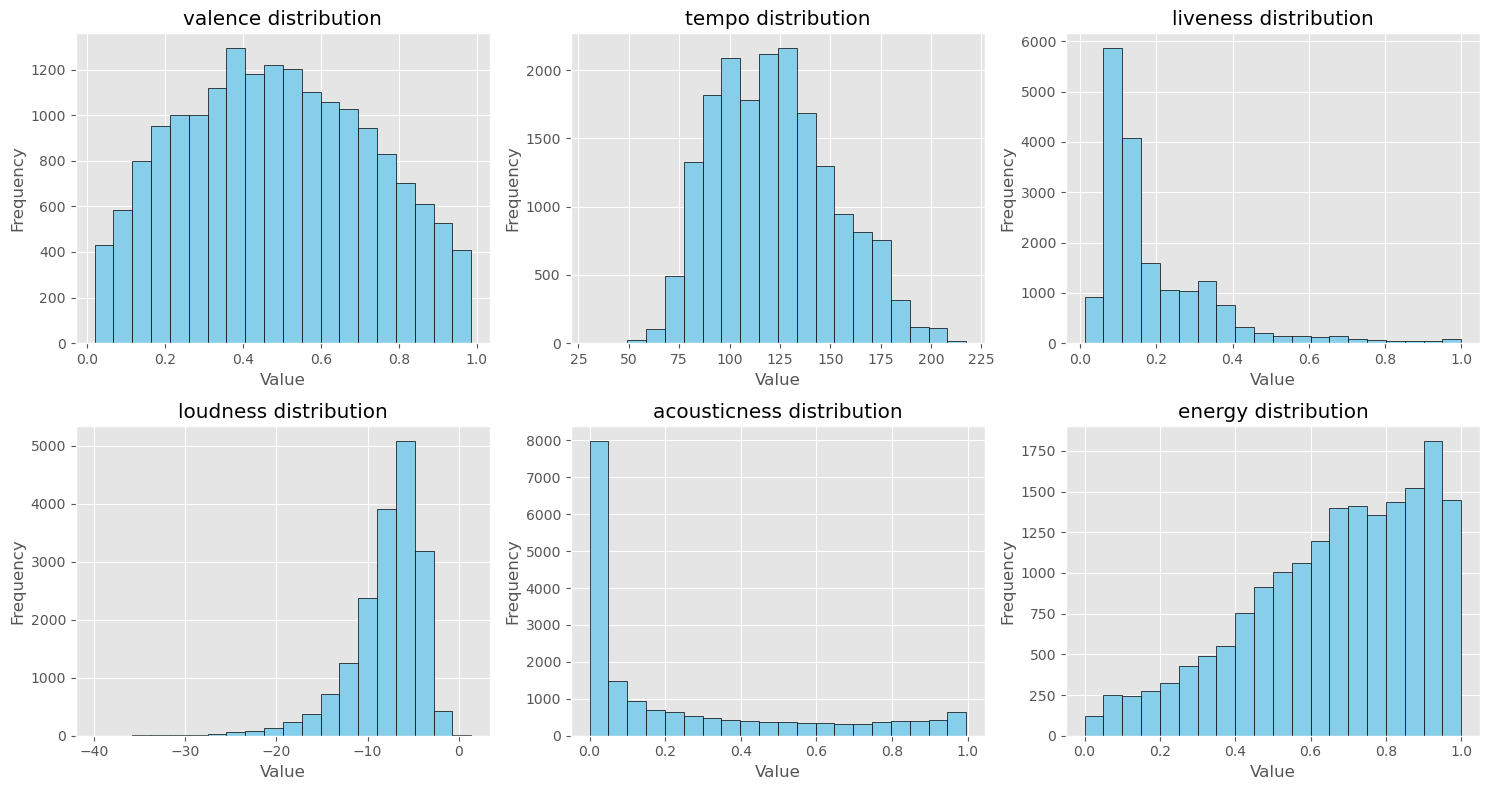

In [5]:
def display_histogram(columns):
    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

    # Flatten the axes for easier iteration
    axes = axes.flatten()

    # Create histograms for each column using a for loop
    for i, column in enumerate(columns):
        ax = axes[i]
        ax.hist(features[column], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'{column} distribution')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [4]:
features = df[['valence', 'tempo', 'liveness', 'loudness', 'acousticness', 'energy']]
display_histogram()

The distributions above tells that each of the features are either positively or negatively skewed. We can now proceed normalizing these features so that no data will have a bias in our exploratory data analysis.

In [6]:
from sklearn.preprocessing import StandardScaler

### Valence

The distribution on the Valence feature is seen to be negatively skewed but close to the mean. With this, it is enough to use the module ``sklearn.preprocessing.StandardScaler`` to normalize our data.

In [10]:
valence_scaler = StandardScaler()
features["valence"] = valence_scaler.fit_transform(features["valence"].values.reshape(-1, 1))

C:\Users\Cymon\AppData\Local\Temp\ipykernel_5068\387038938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["valence"] = valence_scaler.fit_transform(features["valence"].values.reshape(-1, 1))


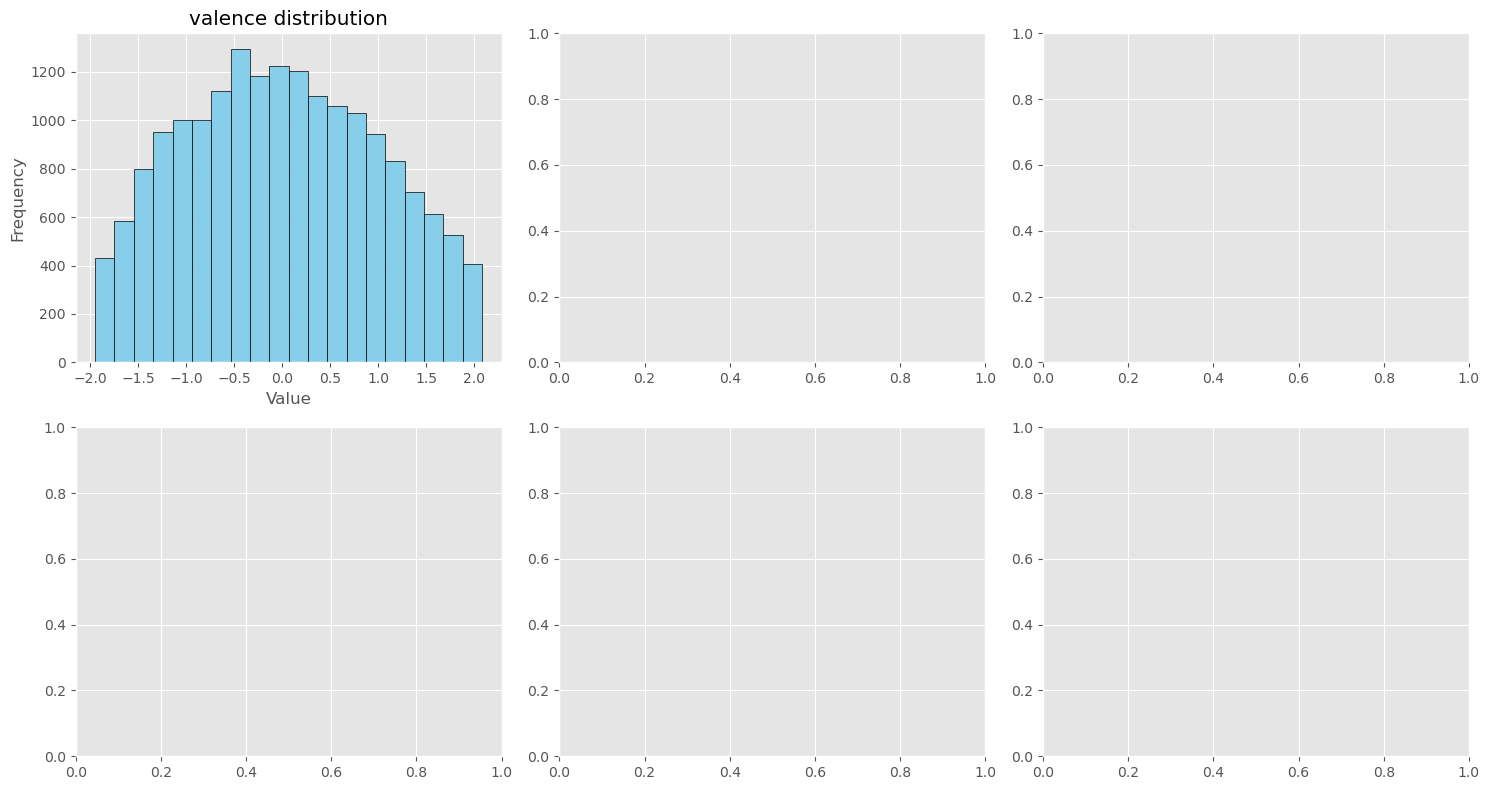

We then check if there are any duplicated data in the dataset. We do this by calling the ??? function. The function checks and returns the duplicated values.

In [ ]:
print("Number of duplicates: ")
print("Duplicated data")

As displayed above there are **``?? duplicates``** in the dataset. These can be simply removed by calling the function the ??? function.

In [ ]:
#drop duplicates

Check which columns have **NaN or Null** values and **count** how many null values each column has.

In [ ]:
# show nan_count per variable

Here is a graph of the amount of null data in each column for better visualization.

In [ ]:
# nan bar graph

The dataset should first be described for us to know how to handle the NaN values. Here we used the ??? function to...

In [ ]:
# 

Now that we have cleaned all columns that will be used for this notebook. We can now begin the [Exploratory Data Analysis](#exploratory-data-analysis).

## Exploratory Data Analysis

-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

### Question 1: Question

### EDA Question 1 Results